# 1. Libraries and settings

In [1]:
import pandas as pd
import numpy as np
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils
#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

D:\Value of Dream\108-1 深度學習\Deep Learning Tool\CNN\NYSE Stock: ['Categorical Dependent Variable', 'Continuous Dependent Variable']
D:\Value of Dream\108-1 深度學習\Deep Learning Tool\CNN\NYSE Stock\Continuous Dependent Variable: ['.ipynb_checkpoints', 'CNN1D for continuous y.ipynb', 'CNN1D for continuous y.pdf', 'CNN2D for continuous y.pdf']


Using TensorFlow backend.


# 2. Analyze data

In [2]:
df = pd.read_csv("D:/Value of Dream/108-1 深度學習/Deep Learning Tool/Data/prices-split-adjusted.csv", index_col = 0)
print(df.info())
print(df.head())
print(df.values.shape)
# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB
None
           symbol        open       close         low        high     volume
date                                                                        
2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  2163600.0
2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001  2386400.0
2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998  2489500.0
2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002  2006300.0
2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002  1408600.0
(851264, 6)

number of different stocks:  501
['LOW', 'TSCO', 'XL', 'MYL', 'WU', '

In [3]:
df.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [4]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


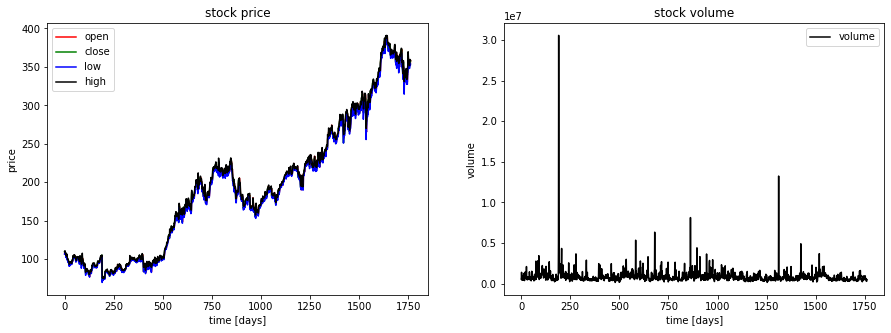

In [5]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'EQIX'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'EQIX'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

# 3. Manipulate data 
- choose a specific stock
- drop feature: volume
- normalize stock data
- create train and test data sets

In [6]:
def feature_normalize(train):
    train_norm = train.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))  #標準化(介於0~1之間)
    return train_norm

In [7]:
## 很重要  切割視窗
def create_segments_and_labels(df, time_steps, step):#, label_name):
    """
    This function receives a dataframe and returns the reshaped segments
    of x,y,z acceleration as well as the corresponding labels
    Args:
        df: Dataframe in the expected format
        time_steps: Integer value of the length of a segment that is created
    Returns:
        reshaped_segments
        labels:
    """
#圖畫中的overlap越高，代表資料中的相關性越強
#圖中80筆資料一次跳40筆，代表其並非相關性高
#feature 有四個
    N_FEATURES = 4
#選擇測試切出20%
    test_set_size_percentage = 20
    segments = []
    labels = []
    
    data_raw = df.as_matrix()
#創造時間窗，將所有選擇特徵一起切割視窗
    for i in range(0, len(data_raw) - time_steps, step):#
        segments.append(data_raw[i: i + time_steps])
       
    segments = np.array(segments);     
    test_set_size = int(np.round(test_set_size_percentage/100*segments.shape[0]));
    train_set_size = segments.shape[0] - (test_set_size);    
#以訓練資料占比分割訓練測試集，並以視窗最後一筆資料當作預測值    
    x_train = segments[:train_set_size,:-1,:]
    y_train = segments[:train_set_size,-1,:]

#     x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
#     y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]

    x_test = segments[train_set_size:,:-1,:]
    y_test = segments[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]
#     return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [8]:
# choose one stock & drop volume
df_stock = df[df.symbol == 'EQIX'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = feature_normalize(df_stock_norm)


# create train, test data
time_steps = 20# choose sequence length
step = 5
x_train, y_train, x_test, y_test = create_segments_and_labels(df_stock_norm, time_steps, step)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
# print('x_valid.shape = ',x_valid.shape)
# print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['open', 'close', 'low', 'high']
x_train.shape =  (279, 19, 4)
y_train.shape =  (279, 4)
x_test.shape =  (70, 19, 4)
y_test.shape =  (70, 4)


d:\programfiles\python37\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [9]:
df_stock_norm.values.shape

(1762, 4)

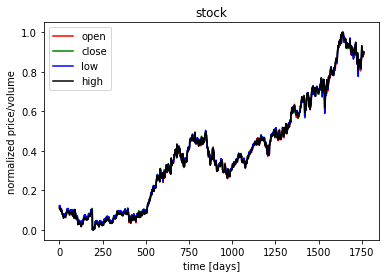

In [10]:
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='close')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [11]:
# num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
# input_shape = (num_time_periods*num_sensors)   ## 80*3  每一筆資料 80(時間窗) 3個變數( xyz) 
# x_train_reshape = x_train.reshape(x_train.shape[0], input_shape).astype('float32')
# print(f"x_train_reshape.shape:{x_train_reshape.shape}")
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
input_shape = (num_time_periods*num_sensors)   ## 80*3  每一筆資料 80(時間窗) 3個變數( xyz) 
x_train_reshape = x_train.reshape(x_train.shape[0], input_shape).astype('float32')
print(f"x_train_reshape.shape:{x_train_reshape.shape}")
x_test_reshape = x_test.reshape(x_test.shape[0], input_shape).astype('float32')
print(f"x_test_reshape.shape:{x_test_reshape.shape}")

x_train_reshape.shape:(279, 76)
x_test_reshape.shape:(70, 76)


# CNN1D

In [12]:
model_cnn1d = Sequential()
# num_time_periods*num_sensors
model_cnn1d.add(Reshape((num_time_periods, num_sensors), input_shape=(input_shape,))) 
model_cnn1d.add(Conv1D(100, 2, activation='relu', input_shape=(num_time_periods, num_sensors)))
model_cnn1d.add(Conv1D(100, 2, activation='relu'))
model_cnn1d.add(MaxPooling1D(3))
model_cnn1d.add(Conv1D(160, 2, activation='relu'))
model_cnn1d.add(Conv1D(160, 2, activation='relu'))
model_cnn1d.add(GlobalAveragePooling1D())
model_cnn1d.add(Dropout(0.5))
# model_m.add(Dense(num_classes, activation='softmax'))
model_cnn1d.add(Dense(units=4, kernel_initializer="normal", activation="softmax")) 
print(model_cnn1d.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 19, 4)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 18, 100)           900       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 17, 100)           20100     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 100)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 160)            32160     
_________________________________________________________________
conv1d_4 (Conv1D)    

In [13]:
BATCH_SIZE = 400
EPOCHS = 50
# training stops early
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_cnn1d.compile(loss='MSE',
                optimizer='adam', metrics=['MSE'])

history = model_cnn1d.fit(x_train_reshape, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=callbacks_list, validation_split=0.2, verbose=1)

# %%

print("\n--- Learning curve of model training ---\n")



Instructions for updating:
Use tf.cast instead.
Train on 223 samples, validate on 56 samples
Epoch 1/50
223/223 [==============================] - 0s 2ms/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
Epoch 2/50
223/223 [==============================] - 0s 94us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
Epoch 3/50
223/223 [==============================] - 0s 98us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
Epoch 4/50
223/223 [==============================] - 0s 103us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
Epoch 5/50
223/223 [==============================] - 0s 104us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
Epoch 6/50
223/223 [==============================] - 0s 103us/step - loss: 0.0238 - mean_s

d:\programfiles\python37\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: val_loss,val_mean_squared_error,loss,mean_squared_error
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 8/50
223/223 [==============================] - 0s 101us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
Epoch 9/50
223/223 [==============================] - 0s 103us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
Epoch 10/50
223/223 [==============================] - 0s 98us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
Epoch 11/50
223/223 [==============================] - 0s 103us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
Epoch 12/50
223/223 [==============================] - 0s 112us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
Epoch 13/50
223/223 [==============================] - 0s 98us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
Epoch 14/50
22

In [23]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

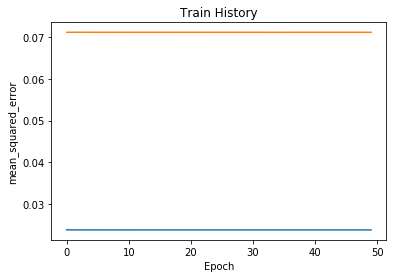

In [24]:
show_train_history(history, "mean_squared_error", "val_loss") ## 訓練正確率圖

In [25]:
scores = model_cnn1d.evaluate(x_test_reshape, y_test)
print(f"MSE:{scores[0]}")

70/70 [==============================] - 0s 99us/step
MSE:0.3237053368772779
